## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import platform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow_addons.metrics import RSquare

from sklearn import linear_model

c:\Users\Frederik\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
# Ausgabe der Versionen
print(platform.python_version())
print(tf.__version__)

3.9.2
2.12.0


In [3]:
data = pd.read_csv('Daten/vgsales.csv', index_col='Rank')

In [4]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## Preprocessing

In [5]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

data.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [7]:
# Analyse der fehlenden Daten
data.isnull().sum() 

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [8]:
# Befüllen leerer Jahresfelder mit dem durchschnittlichen Veröffentlichungsjahr  
data['Year'] = data['Year'].fillna(data['Year'].mean()) 

In [9]:
# Entfernen der Spiele in denen Daten fehlen
data = data.dropna(axis=0)   

In [10]:
data.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

## Encoding

In [11]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [12]:
# Ausgabe aller Genre 
data['Genre'].unique() 

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
# Publisher, die weniger als 50 Spiele veröffentlicht haben, werden den Small Publisher zugeordnet
counts = data['Publisher'].value_counts()
data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

C:\Users\Frederik\AppData\Local\Temp\ipykernel_27156\1636112780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)


In [14]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Small Publisher,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [15]:
# Umwandel von Platform, Genre und Publisher in numerische Werte
onehot_columns = ['Platform', 'Genre', 'Publisher'] 
def onehot_encode(data, columns):  
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [16]:
data = onehot_encode(data, onehot_columns)

In [17]:
# Entfernen der Spiele die vor 2000 Veröffentlicht wurden, da die Verkaufszahlen davor noch sehr gering waren
data = data[data['Year'] >= 2000] 

In [18]:
data

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,30.01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006.0,29.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling

In [19]:
y = data['Global_Sales'] # Speichern der Ziel Variable Globale Verkäufe in y
X = data.drop('Global_Sales', axis=1) # Entfernen der Globalen Verkäufe aus den Features

In [20]:
X

,Year,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Liste der Spalten(Features) Namen
column_names = X.columns.tolist() 

In [22]:
# Features auf eine vergleichbare Skala bringen
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Größe der Tabelle
X.shape 

(14566, 91)

## Training

In [24]:
# Von den Daten werden 80% für Training und 20% für Testen verwendet
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) 

In [25]:
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)

## Ergebnisse

In [26]:
# Ausgabe von R^2-Wert
result = RSquare()
result.update_state(y_test, y_pred)
print("\nR^2 Score:", result.result())


R^2 Score: tf.Tensor(0.11892915, shape=(), dtype=float32)


In [27]:
# Ausgabe von MSE
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.7052828154677357


In [28]:
# Ausgabe von p-Wert
mod = sm.OLS(y_train,X_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(fii.summary2())
print(p_values)

                                 Results: Ordinary least squares
Model:                        OLS                    Adj. R-squared (uncentered):       0.095     
Dependent Variable:           Global_Sales           AIC:                               42347.1222
Date:                         2023-07-15 12:31       BIC:                               42921.4543
No. Observations:             11652                  Log-Likelihood:                    -21096.   
Df Model:                     78                     F-statistic:                       16.71     
Df Residuals:                 11574                  Prob (F-statistic):                2.06e-208 
R-squared (uncentered):       0.101                  Scale:                             2.2029    
--------------------------------------------------------------------------------------------------
             Coef.             Std.Err.         t    P>|t|         [0.025             0.975]      
--------------------------------------------

Text(0.5, 0, 'Predicted Values')

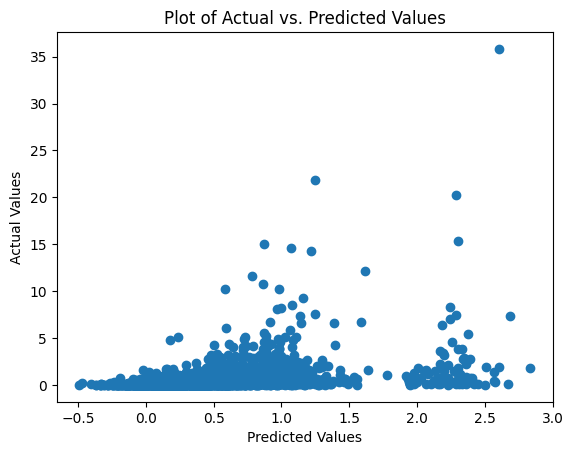

In [29]:
plt.scatter(y_pred, y_test)
plt.title('Plot of Actual vs. Predicted Values')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')